In [89]:
##Import
import pandas as pd
import numpy as pd
import json
import pip
!pip install lxml html5lib beautifulsoup4
!pip install geopy
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0
from pandas.io.json import json_normalize
import folium
import requests
import urllib.request
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt  
%matplotlib inline 
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


<h2> Data Acquistion </h2>

<h3> Data Uploading </h3>

Cases per City in LA County

In [34]:
url = 'http://publichealth.lacounty.gov/media/coronavirus/locations.htm#top-25'
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.text,"html.parser")
##Input the table you want to scrape
table = soup.findAll('table',{"class":"overflow-y"})[0]
values =[]
# CHOOSE HOW MANY
tr = table.findAll(['tr'])[1:225]
csvFile = open("cases.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

200


Reload into Pandas

In [70]:
import pandas as pd
df.cases= pd.read_csv("cases.csv", header=None,)
##Rename Columns
df.cases.columns = ['Name', 'Cases', 'Case Rate', 'Death', 'Death Rate']
## Strip City of, Strip Los Angeles - 
df.cases['Name'] = df.cases['Name'].str.replace(r'City of', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'Los Angeles -', '')
df.cases['Name'] = df.cases['Name'].str.replace(r'*', '')
df.cases.head(50)

,Name,Cases,Case Rate,Death,Death Rate
0,Agoura Hills,797,3817,11,53
1,Alhambra,5722,6598,108,125
2,Arcadia,2199,3808,75,130
3,Artesia,1683,10021,35,208
4,Avalon,9,233,0,0
5,Azusa,5349,10689,73,146
6,Baldwin Park,11372,14813,186,242
7,Bell,5723,15752,77,212
8,Bell Gardens,7158,16619,61,142
9,Bellflower,9083,11685,110,142


<h2> Describe Data Set of Cases and Deaths in Los Angeles</h2>

In [81]:
##Drop the Rates and Describe cases
drop_these = ['Case Rate', 'Death Rate']
df.cases_final = df.cases.drop(columns=drop_these)
df.cases_final.describe()

,Cases,Death
count,224.000000,224.000000
mean,5643.504464,80.700893
std,28147.882940,399.210268
min,5.000000,0.000000
25%,761.000000,8.000000
50%,2164.500000,35.000000
75%,5523.500000,75.000000
max,420111.000000,5960.000000


<AxesSubplot:>

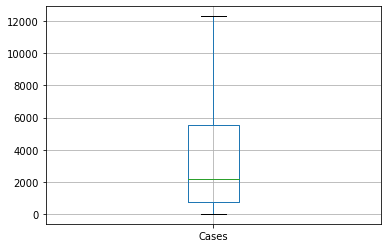

In [90]:
df.cases_final.boxplot(column=['Cases'], showfliers=False)

<AxesSubplot:>

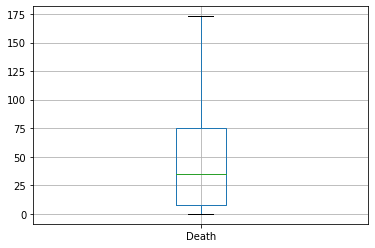

In [91]:
df.cases_final.boxplot(column=['Death'], showfliers=False)